In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import glob
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
filename='Chlorophyll_1508.csv' 
chloro=pd.read_csv(filename,delimiter=';',skiprows=1) #Read csv with chlorophyll absorbance
chloro=np.array(chloro)[0][1:-1] #to array

In [3]:
filenames=sorted(glob.glob('*08.csv')) #get all filenames

od = [pd.read_csv(file,delimiter=';',skiprows=2,header=None) for file in filenames] #read spectra
od=np.array(od) #to array

for i in range(1,len(od)):
    od[i].iloc[:,1:]=od[i].iloc[:,1:]*2 #double all absorbances (2:1 dilution)

od750=od[10][od[10][0]==750] #get only OD750

od750=np.array(od750)[0,1:] #to array

In [4]:
norm_chloro=chloro/od750 #normalize to OD750

In [5]:
chlorophyll=norm_chloro*13.9 #calculate concentration in ug/ml

In [6]:
x_value=[]
means=[]
err=[]
i=0
x=0

#means and std of biological triplicates

while i < len(chlorophyll):
    x_value.append([x+1]*len(chlorophyll[i:i+3])) 
    means.append(chlorophyll[i:i+3].mean()) 
    err.append(chlorophyll[i:i+3].std())
    i+=3
    x+=1

In [7]:
#labels
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']

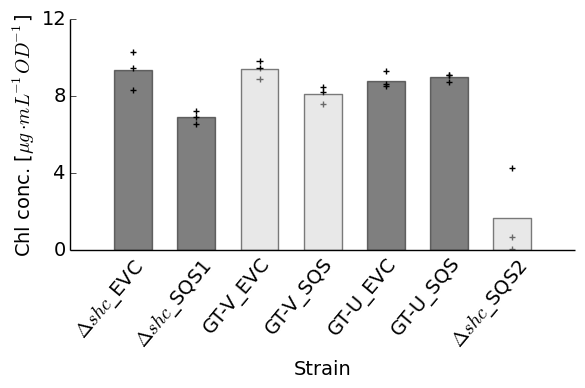

In [8]:
i=0
x=1

ax = plt.subplot(111)

while i < len(chlorophyll):
    ax.scatter([x]*3,chlorophyll[i:i+3],marker='+',c='k') #scatter data points
    i+=3
    x+=1

#barplot
ax.bar(np.array(range(1,len(means)+1))-0.3,means,color=['k','k','lightgray','lightgray','k','k','lightgray'],width=0.6, alpha=0.5)

#format plot
plt.yticks(fontsize=14)
plt.xticks(np.array(range(1,len(means)+1))-0.35,labeli,rotation=50,fontsize=14) #xticks
plt.tight_layout()
plt.ylabel('Chl conc. [$\mu g \cdot mL^{-1} OD^{-1}$]',fontsize=14)
plt.xlabel('Strain',fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

ax.yaxis.set_major_locator(MaxNLocator(3))

plt.ylim(0,12)

plt.tight_layout()

#save plot
#plt.savefig('chlorophyll.png',bbox_inches='tight',dpi=1000)
